In [20]:
import numpy as np
import cv2
from PIL import Image
import skimage
import matplotlib.pyplot as plt

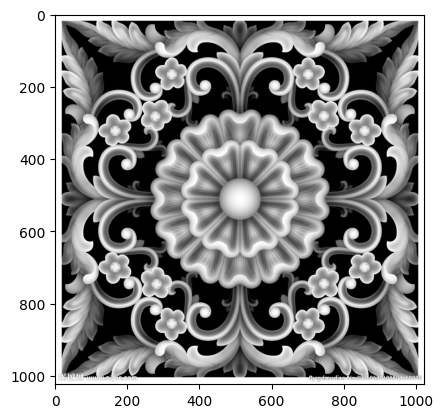

In [21]:
image = cv2.imread("../images/gray.jpg", flags=0)
plt.imshow(image, cmap="gray")

150.0


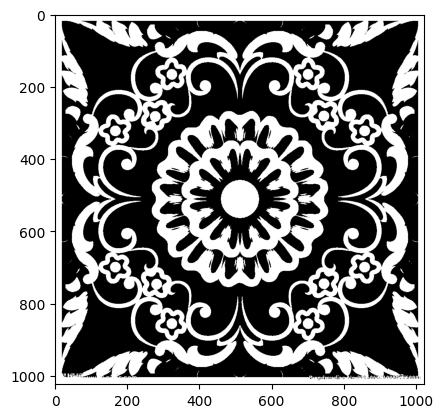

In [22]:
retval, binary = cv2.threshold(
    src=image,
    thresh=150, # 阈值
    maxval=255, # dst图像中最大值 只对 THRESH_BINARY 和 THRESH_BINARY_INV 有效果
    type=cv2.THRESH_BINARY,
)
print(retval)
plt.imshow(binary, cmap="gray")

# connectedComponents() 计算连通区域,可以计算连通区域的个数

仅仅创建了一个标记图（图中不同连通域使用不同的标记，和原图宽高一致）

连通域可以进行遍历

In [23]:
# num_labels：所有连通域的数目
# labels：图像上每一像素的标记，用数字1、2、3…表示（不同的数字表示不同的连通域）
num_objects, labels = cv2.connectedComponents(
    image=binary # 必须为灰度图
)
print(num_objects)
print(np.unique(labels))

86
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85]


In [24]:
index_list = []
for i in np.unique(labels):
    area = np.sum(labels==i)
    # 忽略面积小的连通域
    if area > 10000:
        index_list.append(i)
print(index_list)

[0, 1, 17, 27]


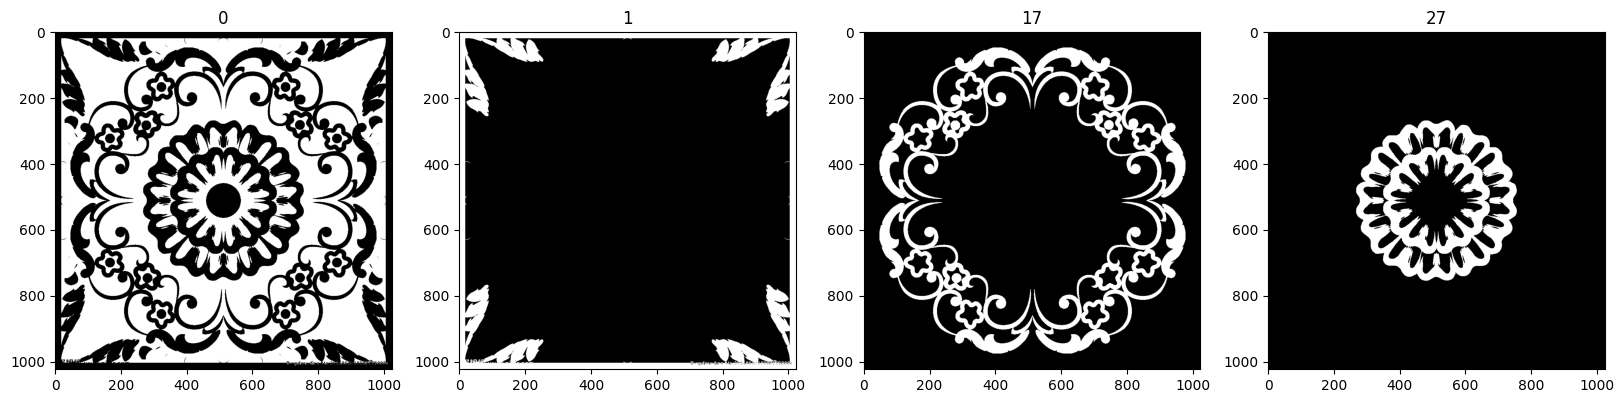

In [25]:
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(20, 10))
for i, ax in zip(index_list, axes.flatten()):
    ax.imshow(np.array(labels==i, dtype=np.uint8), cmap="gray")
    ax.set_title(i)
plt.show()

# connectedComponentsWithStats() 对一幅图像进行连通域提取

In [26]:
# num_labels：所有连通域的数目
# labels：    图像上每一像素的标记，用数字1、2、3…表示（不同的数字表示不同的连通域）
# stats：     每一个标记的统计信息，是一个5列的矩阵，每一行对应每个连通区域的外接矩形的x、y、width、height和面积，示例如下： 0 0 720 720 291805
# centroids： 连通域的中心点
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(
    image=binary,
    connectivity=8 # 可选值为4或8，也就是使用4连通还是8连通
)
print(num_labels)
print(np.unique(labels))

86
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85]


In [27]:
index_list = []
for i in np.unique(labels):
    area = np.sum(labels==i)
    # 忽略面积小的连通域
    if area > 10000:
        index_list.append(i)
print(index_list)

[0, 1, 17, 27]


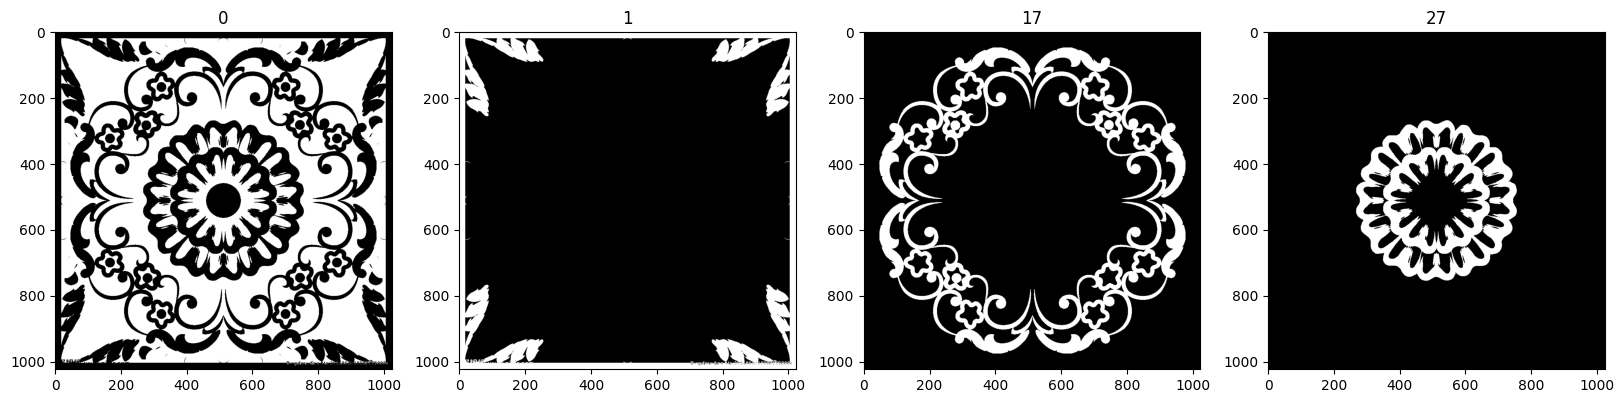

In [28]:
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(20, 10))
for i, ax in zip(index_list, axes.flatten()):
    ax.imshow(np.array(labels==i, dtype=np.uint8), cmap="gray")
    ax.set_title(i)
plt.show()